<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/response_quality/completeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Evaluating Response Matching</h1>


**What is Response Matching?**: Response Completeness is a metric that determines how well the response generated by an LLM matches the ground truth. It comes in handy while checking for the overlap between an LLM generated response and ground truth.

For example, if a user asks a question about the formula of chlorophyll, the ideal response could be: "The formula of chlorophyll is C55H72MgN4O5", rather if the response contains some other information about chlorophyll and not the formula: "Chlorophyll is the pigmet used in photosynthesis, it helpes in generating oxygen." it might not really be ideal as it does not match with the ground truth resulting in a low matching score.

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| question    | The question asked by the user |
| response    | The response given by the model |
| ground_truth    | The ideal response |


 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
good_data = [
    {
        "question" : "What is the formula of chlorophyll",
        'response' : 'Chlorophyll a pigment usuall found in the leaves has the formula C55H72MgN4O5.',
        'ground_truth' : 'The formula of chlorophyll is C55H72MgN4O5'
    }
]

bad_data = [
    {
        "question" : "What is the formula of chlorophyll",
        'response' : 'Chlorophyll is the pigmet used in photosynthesis, it helpes in generating oxygen',
        'ground_truth' : 'The formula of chlorophyll is C55H72MgN4O5'
    }
]

data = good_data + bad_data

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals, ResponseMatching
import json

OPENAI_API_KEY = "sk-***************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [ResponseMatching(method = 'llm')]    #method: llm/exact/rouge
)

2024-02-06 19:25:47.800 | INFO     | uptrain.framework.evalllm:evaluate:113 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res, indent=3))

[
   {
      "question": "What is the formula of chlorophyll",
      "response": "Chlorophyll a pigment usuall found in the leaves has the formula C55H72MgN4O5.",
      "ground_truth": "The formula of chlorophyll is C55H72MgN4O5",
      "response_match_precision": 1.0,
      "response_match_recall": 1.0,
      "score_response_match": 1.0,
      "response_match_method": "llm"
   },
   {
      "question": "What is the formula of chlorophyll",
      "response": "Chlorophyll is the pigmet used in photosynthesis, it helpes in generating oxygen",
      "ground_truth": "The formula of chlorophyll is C55H72MgN4O5",
      "response_match_precision": 0.75,
      "response_match_recall": 1.0,
      "score_response_match": 0.9230769230769231,
      "response_match_method": "llm"
   }
]


## Step 4: Let's look at some of the results 

### Sample with matching responses

In [5]:
print(json.dumps(res[0],indent=3))

{
   "question": "What is the formula of chlorophyll",
   "response": "Chlorophyll a pigment usuall found in the leaves has the formula C55H72MgN4O5.",
   "ground_truth": "The formula of chlorophyll is C55H72MgN4O5",
   "response_match_precision": 1.0,
   "response_match_recall": 1.0,
   "score_response_match": 1.0,
   "response_match_method": "llm"
}


### Sample with not matching responses

In [6]:
print(json.dumps(res[1],indent=3))

{
   "question": "What is the formula of chlorophyll",
   "response": "Chlorophyll is the pigmet used in photosynthesis, it helpes in generating oxygen",
   "ground_truth": "The formula of chlorophyll is C55H72MgN4O5",
   "response_match_precision": 0.75,
   "response_match_recall": 1.0,
   "score_response_match": 0.9230769230769231,
   "response_match_method": "llm"
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [7]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-*******************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-response-matching-evals",
    data = data,
    checks = [ResponseMatching(method = 'llm')]    #method: llm/exact/rouge
)

2024-02-06 19:26:15.787 | INFO     | uptrain.framework.remote:log_and_evaluate:623 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [8]:
print(json.dumps(res, indent=3))

[
   {
      "question": "What is the formula of chlorophyll",
      "response": "Chlorophyll a pigment usuall found in the leaves has the formula C55H72MgN4O5.",
      "ground_truth": "The formula of chlorophyll is C55H72MgN4O5",
      "response_match_precision": 1.0,
      "response_match_recall": 1.0,
      "score_response_match": 1.0,
      "response_match_method": "llm"
   },
   {
      "question": "What is the formula of chlorophyll",
      "response": "Chlorophyll is the pigmet used in photosynthesis, it helpes in generating oxygen",
      "ground_truth": "The formula of chlorophyll is C55H72MgN4O5",
      "response_match_precision": 0.25,
      "response_match_recall": 0.5,
      "score_response_match": 0.4,
      "response_match_method": "llm"
   }
]


### Dashboards: 
Histogram of score vs number of cases with that score

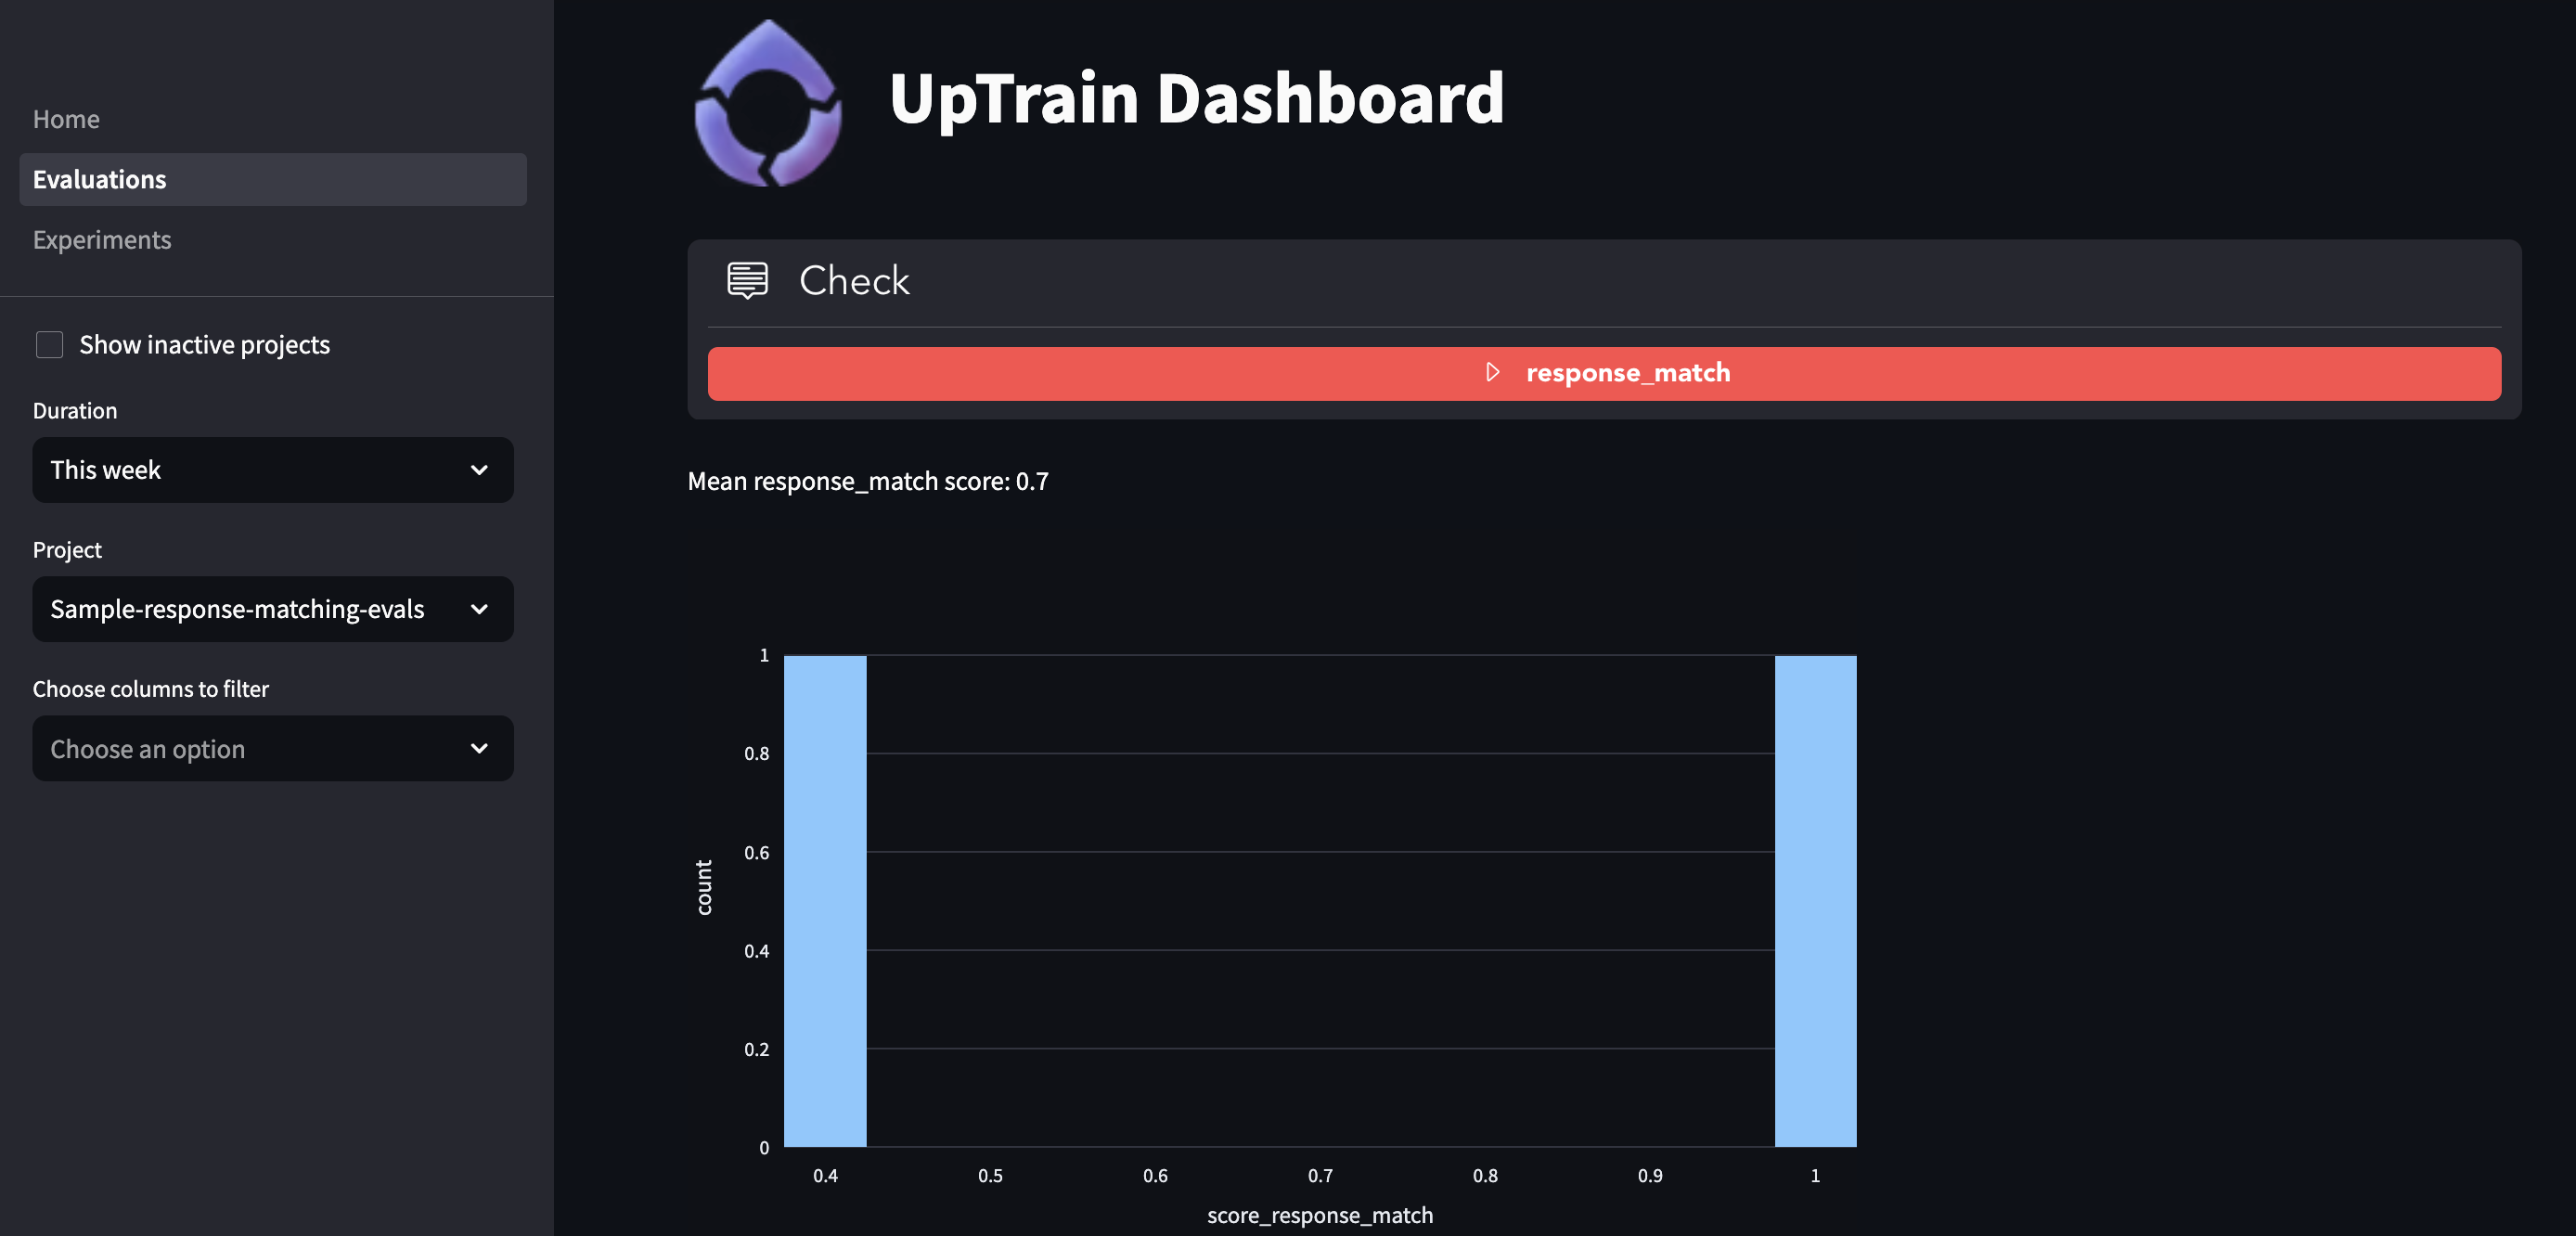

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

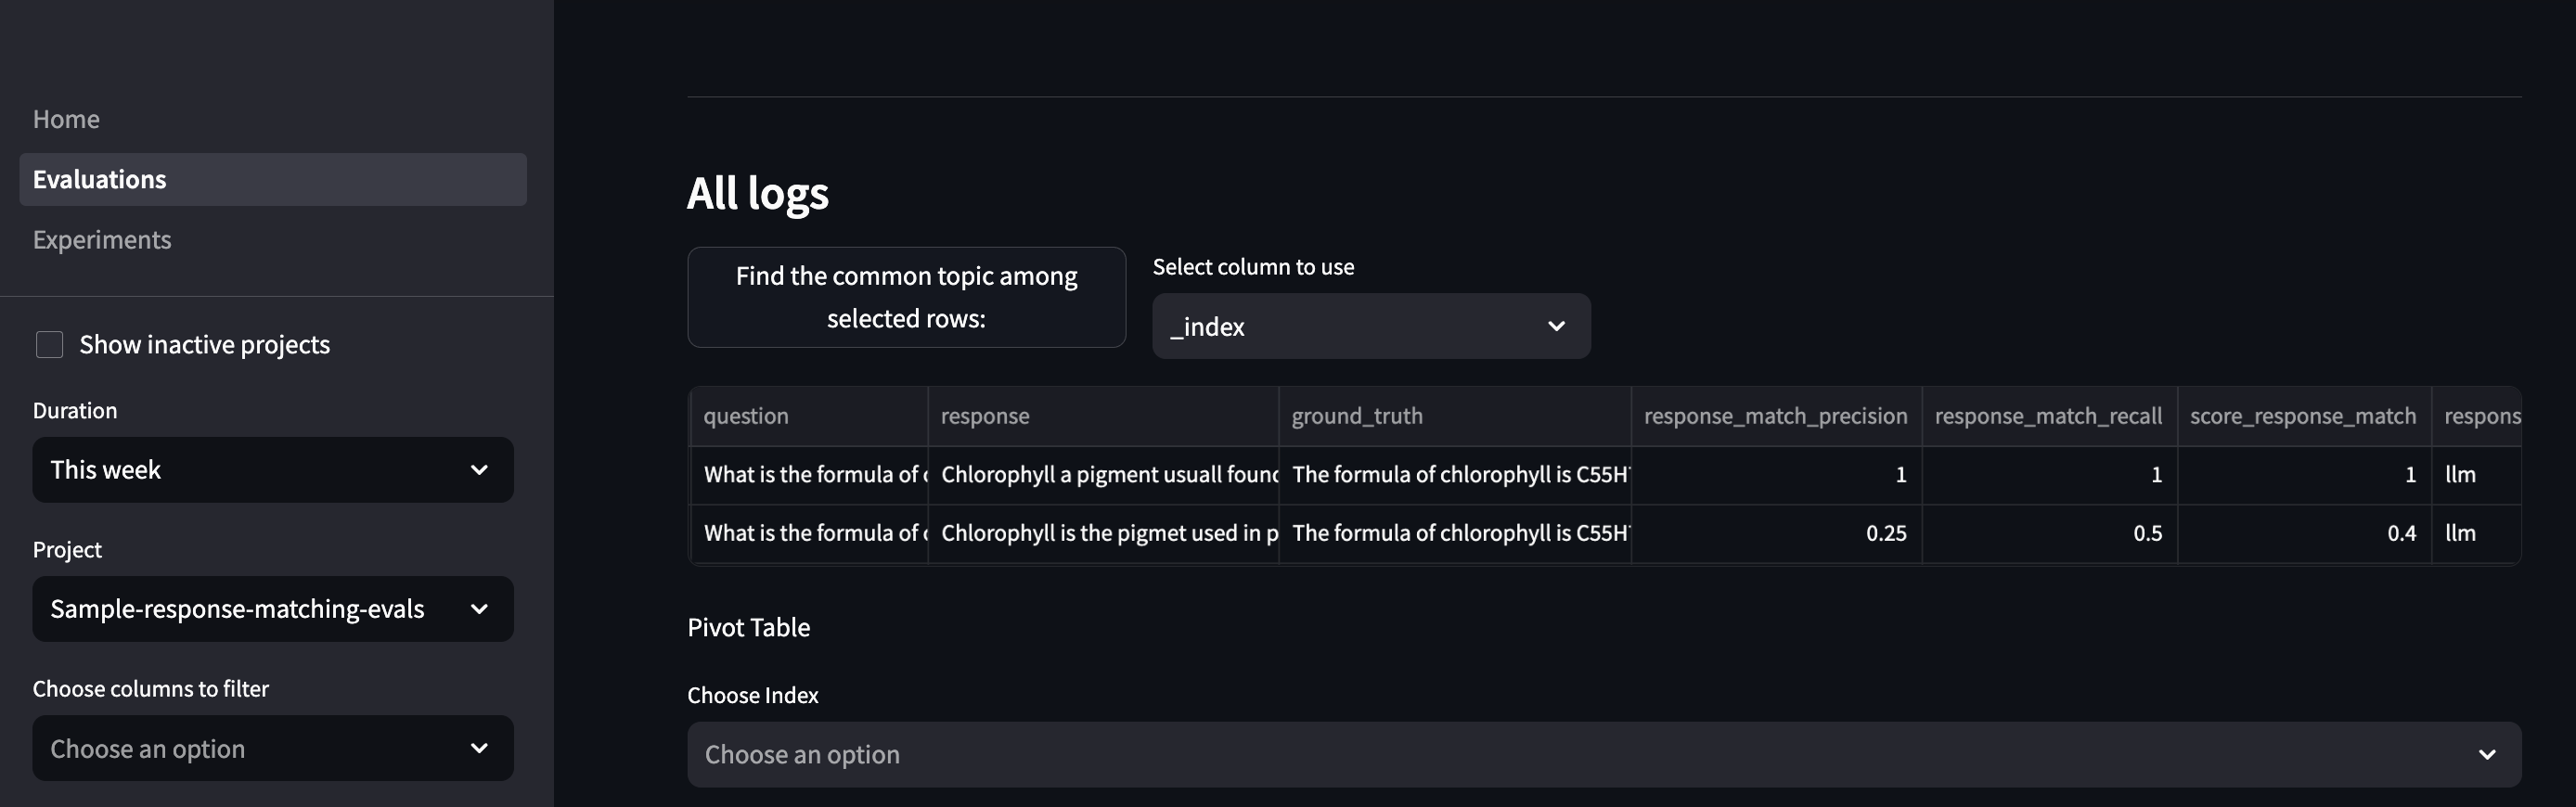